# Validate pyDowker to compute dowker complex, rather than MATLAB

In [2]:
from pyDowker import DowkerComplex # not actually using the installed pyDowker package, rather a local copy of the relevant code
import matplotlib.pyplot as plt
import gudhi as gd
from numpy import genfromtxt
import numpy as np
from sklearn.metrics import pairwise_distances
import networkx as nx

## Check that pyDowker works at all

This is just a copy+paste from pyDowker's Demo.ipynb

<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
C:\Users\cpotvin\AppData\Local\Temp\ipykernel_13000\1136075949.py:21: SyntaxWarning: invalid escape sequence '\m'
  names = ['$H_\\ast(\mathcal{D}(X,X)',
C:\Users\cpotvin\AppData\Local\Temp\ipykernel_13000\1136075949.py:22: SyntaxWarning: invalid escape sequence '\m'
  '$H_\\ast(\mathcal{D}(X,Y)',
C:\Users\cpotvin\AppData\Local\Temp\ipykernel_13000\1136075949.py:23: SyntaxWarning: invalid escape sequence '\m'
  '$H_\\ast(\mathcal{D}(Y,X)',
C:\Users\cpotvin\AppData\Local\Temp\ipykernel_13000\1136075949.py:24: SyntaxWarning: invalid escape sequence '\m'
  '$H_\\ast(\mathcal{D}(Y,Y)']


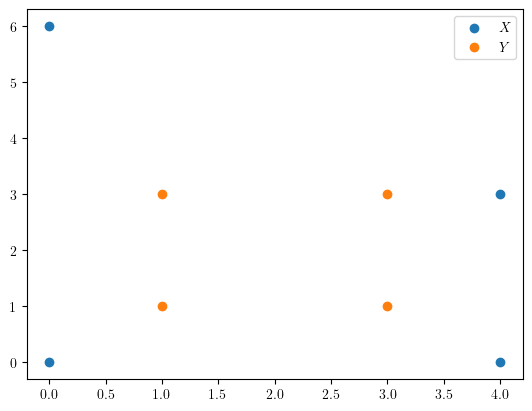

[[3.16227766 4.24264069 3.16227766 1.41421356]
 [4.24264069 3.16227766 1.41421356 3.16227766]
 [3.16227766 4.24264069 5.83095189 5.09901951]
 [3.         1.         2.23606798 3.60555128]]


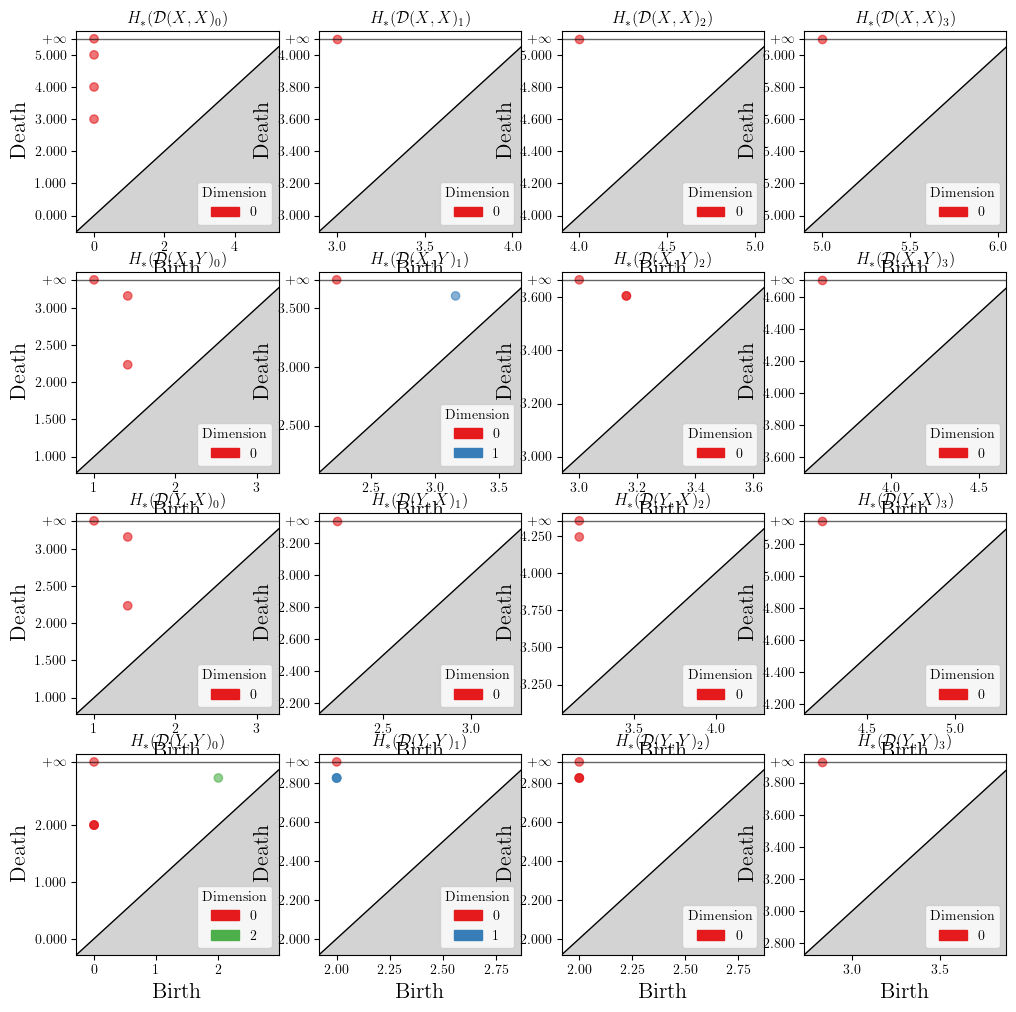

In [5]:
# Let us consider two small point clouds containing four points each.
X = np.array([(0,0),(4,0), (0,6),(4,3)])
Y = np.array([(1,3),(3,3), (3,1),(1,1)])
f,ax = plt.subplots()
ax.scatter(X[:,0],X[:,1], label='$X$')
ax.scatter(Y[:,0],Y[:,1], label='$Y$')
ax.legend()
plt.show()

# For every combination of the two point clouds, we can consider the corresponding Dowker complex.

Dow_XX = DowkerComplex(pairwise_distances(X,X))
Dow_XY = DowkerComplex(pairwise_distances(X,Y))
Dow_YX = DowkerComplex(pairwise_distances(Y,X))
Dow_YY = DowkerComplex(pairwise_distances(Y,Y))

print(pairwise_distances(X,Y))


complexes = [Dow_XX,Dow_XY,Dow_YX,Dow_YY]
names = ['$H_\\ast(\mathcal{D}(X,X)',
         '$H_\\ast(\mathcal{D}(X,Y)',
         '$H_\\ast(\mathcal{D}(Y,X)',
         '$H_\\ast(\mathcal{D}(Y,Y)']

# Let us construct the Dowker complexes and the subcomplexes for
# fixed total weight and compute the persistent homology with 
# respect to sublevels of the distance matrix.

f,ax = plt.subplots(4,4,figsize = (12,12))
for m in range(4):
    Dowker = [C.create_simplex_tree(max_dimension = 4, filtration = "Sublevel", m =m+1) for C in complexes]
    for i in range(4):
        dgm = Dowker[i].persistence()
        gd.plot_persistence_diagram(dgm, axes=ax[i,m])
        ax[i,m].set_title(names[i]+'_{})$'.format(m))
plt.show()

## Now check it produces same barcodes as MATLAB on our actual data

(165, 165)
[[   0. 1000. 1000. ...   17.   18.   19.]
 [   1.    0. 1000. ...   18.   19.   20.]
 [   2.    1.    0. ...   19.   20.   21.]
 ...
 [1000. 1000. 1000. ...    0.    1.    2.]
 [1000. 1000. 1000. ...   40.    0.    1.]
 [1000. 1000. 1000. ...   39.   40.    0.]]


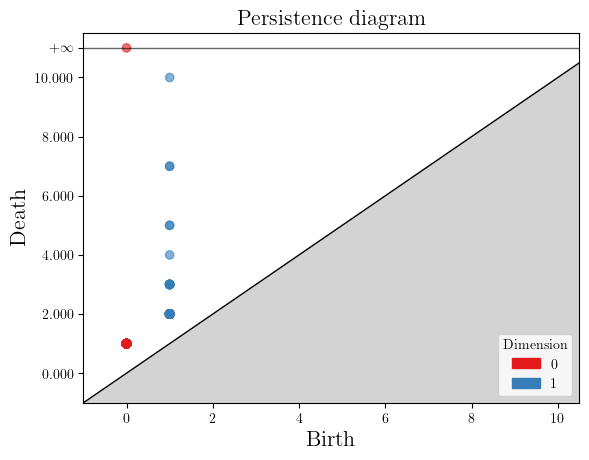

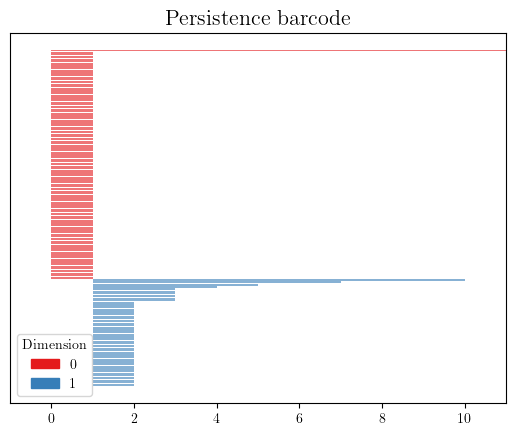

Bars:  [(1, (1.0, 10.0)), (1, (1.0, 7.0)), (1, (1.0, 7.0)), (1, (1.0, 5.0)), (1, (1.0, 5.0)), (1, (1.0, 4.0)), (1, (1.0, 3.0)), (1, (1.0, 3.0)), (1, (1.0, 3.0)), (1, (1.0, 3.0)), (1, (1.0, 3.0)), (1, (1.0, 3.0)), (1, (1.0, 3.0)), (1, (1.0, 3.0)), (1, (1.0, 3.0)), (1, (1.0, 3.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (1.0, 2.0)), (1, (

In [6]:
# this produces the same barcode (as a pd) as running MATLAB function graph_pers
# on the same csv distance matrix
l63_dist = genfromtxt('Dowker/L63-weighted-shortest-path.csv',delimiter=',')
print(l63_dist.shape)
large = 1000 
l63_dist[l63_dist == -1] = large #infinite distance/no path was flagged -1 in this dataset
print(l63_dist)


MNeighbor = DowkerComplex(l63_dist).create_simplex_tree(filtration='Sublevel', max_dimension=2)
dgms = MNeighbor.persistence()
f,ax = plt.subplots()
gd.plot_persistence_diagram(dgms, axes=ax)
plt.show()

gd.plot_persistence_barcode(dgms)
plt.show()

print("Bars: ",dgms)